## Séries de Potência

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$ 	\sum_{n=0}^{\infty} C_{n}\cdot(x-a)^n $$
1. Converge apenas para $x = a$;
2. Converge em um intervalo aberto ou fechado;
3. Converge absolutamente em $R$;

## Séries de Potência de números complexos

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$ \sum_{n=0}^{\infty} a_{n}\cdot(z-z_{0})^n $$
1) só converge em $z = z_{0}$;\
2) existe um $r > 0$ tal que $\vert z-z_{0} \vert < r$ a série converge absolutamente e se $0 ≤ r < r'$, a convergência é uniforme no disco fechado  $D_{r'} =\left \{ z;\vert z-z_{0} \vert ≤ r' \right \}$. Além do mais, se $\vert z-z_{0} \vert > r$ a série diverge;\
3) a série converge absolutamente para todo $z \in \mathbb{C}$ e uniformemente em todo disco fechado $D_{r'} =\left \{ z;\vert za-z_{0} \vert ≤ r' \right \}$.

In [ ]:
from sympy import *
import numpy as np
from sympy.solvers.inequalities import reduce_inequalities
import re
import math
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
n, i, z = symbols('n i z')
i = sqrt(-1)
init_printing(use_unicode=True)

In [ ]:
zn1 = "(z-3)**n/n"
zn2 = '(z/2)**n'
zn3 = '(-1)**n*z**n/n'
zn4 = 'z**n/factorial(n)'
zn5 = 'factorial(2*n)*((z+9)/2)**n'
zn6 = '(-1)**(n+1)*(z-5)**n/(n*5**n)'
zn7 = '(-1)**(n+1)*(z-1)**(n+1)/(n+1)'
zn8 = 'n*(-2*z)**(n-1)/(n+1)'
zn9 = 'z**(2*n+1)/factorial(2*n+1)'

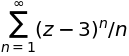

In [ ]:
Sum(eval(zn1), (n, 1, oo))

### Teste da razão

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
Seja a série de potências:
$ \sum_{n=0}^{\infty} a_{n}\cdot(z-z_{0})^n $
\
Fazendo $\lim_{n \to \infty} {|a_{n+1}| \over |a_n|} = L $ se:
* $L < 1$ a série é absolutamente convergente (portanto convergente);
* $L>1$ ou $L=\infty$ ou $L=1^{+}$, a série é divergente;
*$L=1$, o teste é inconclusivo.

Quais valores de z, onde a série converge?

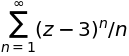

In [ ]:
zn1_ = zn1.replace('n','(n+1)') 
Sum(eval(zn1), (n, 1, oo))

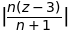

In [ ]:
expr1 = eval(zn1)
expr2 = eval(zn1_)
teste_razao = simplify(abs(expr2/expr1))
teste_razao

In [ ]:
lim =  limit(teste_razao, n, oo)
lim

In [ ]:
lim = eval('1 > '+ str(lim))
lim

In [ ]:
inequacao = str(reduce_inequalities(lim, [z]))
inequacao

'(2 < z) & (z < 4)'

Quando a série converge para quaisquer valor de z.

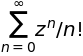

In [ ]:
zn4_ = zn4.replace('n','(n+1)') 
Sum(eval(zn4), (n, 0, oo))

In [ ]:
expr1 = eval(zn4)
expr2 = eval(zn4_)
teste_razao = simplify(abs(expr2/expr1))
teste_razao

In [ ]:
lim =  limit(teste_razao, n, oo) # Não importa o valor de z, como 0 < 1, coverge para todo z c C
lim

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
Quando a série converge somente para $z = z_0$

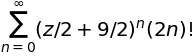

In [ ]:
zn5_ = zn5.replace('n','(n+1)') 
Sum(eval(zn5), (n, 0, oo))

In [ ]:
expr1 = eval(zn5)
expr2 = expr2 = eval(zn5_)
teste_razao = simplify(abs(expr2/expr1))
teste_razao

In [ ]:
lim =  limit(teste_razao, n, oo) # Ùnico valor em que a série converge é quando z = z0
lim

In [ ]:
list_series = [zn1,zn2,zn3,zn4,zn5,zn6,zn7,zn8,zn9]

### Função - Raio de conergência

In [ ]:
def intervalo_convergencia(zn):
    # encontrando z(n+1)
    zn1 = zn.replace('n','(n+1)') 
    # Tranformando em expressõe matemáticas
    expr1 = eval(zn) 
    expr2 = eval(zn1)
    # Aplicamdo o teste da razão
    teste_razao = simplify(abs(expr2/expr1))
    lim =  limit(teste_razao, n, oo)
    if str(lim) == '0':
        return '0' # Ou seja, converge para todo z pertencente aos complexos
    elif str(lim)[0:2] == 'oo':
        z0 = re.findall(r'-?\d+', str(lim))
        return z0
    else:
        inequacao = eval('1 > '+ str(lim))
        inequacao = str(reduce_inequalities(inequacao, [z]))
        intervalo = re.findall(r'-?\d+\W?\d*', inequacao) # ReGex
        if len(intervalo[1]) != 1:
            intervalo[1] = intervalo[1].replace(')','') # gambiarra para retirar o parênteze que as vezes atrapalha
        return intervalo
    
    

In [ ]:
def raio_convergencia(zn, start=0):
    display(Sum(eval(zn), (n, start, oo)))
    resultado = intervalo_convergencia(zn)
    if resultado == '0':
        print('Raio de convergência é igual à infinito. Converge para todo z c C')
    elif len(resultado) < 2:
        if len(resultado) == 0:
            print('Raio de convergência é 0. Quando Z - Z0 = 0.\nNeste caso z = 0')
        else:  
            print('Raio de convergência é 0. Quando Z - Z0 = 0.\nNeste caso z ={}'.format(-(float(resultado[0]))))
    else:
        a = resultado[0]
        b = resultado[1]
        print('Raio de convergência está contido no intervalo [{},{}].'.format(a,b))
        

----------------------------------------------------------------------------------------------------


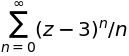

Raio de convergência está contido no intervalo [2 ,4].
----------------------------------------------------------------------------------------------------


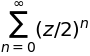

Raio de convergência está contido no intervalo [-2 ,2].
----------------------------------------------------------------------------------------------------


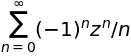

Raio de convergência está contido no intervalo [-1 ,1].
----------------------------------------------------------------------------------------------------


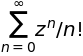

Raio de convergência é igual à infinito. Converge para todo z c C
----------------------------------------------------------------------------------------------------


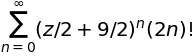

Raio de convergência é 0. Quando Z - Z0 = 0.
Neste caso z =-9.0
----------------------------------------------------------------------------------------------------


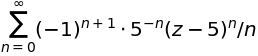

Raio de convergência está contido no intervalo [0 ,10].
----------------------------------------------------------------------------------------------------


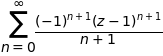

Raio de convergência está contido no intervalo [0 ,2].
----------------------------------------------------------------------------------------------------


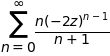

Raio de convergência está contido no intervalo [-1/2,1/2].
----------------------------------------------------------------------------------------------------


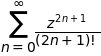

Raio de convergência é igual à infinito. Converge para todo z c C
----------------------------------------------------------------------------------------------------


In [ ]:
print('-'*100)
for i in list_series:
    raio_convergencia(i)
    print('-'*100)

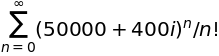

In [ ]:
zn4 = '(50000+400*sqrt(-1))**n/factorial(n)'
display(Sum(eval(zn4), (n, 0, oo)))
zn4_ = zn4.replace('n','(n+1)') 
expr1 = eval(zn4)
expr2 = expr2 = eval(zn4_)
teste_razao = simplify(abs(expr2/expr1))
lim =  limit(teste_razao, n, oo)
lim

## Série de Taylor
### Expansão em série de Taylor de uma função:

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
Seja $f = f(z)$ uma função arbitrária,
contínua e suave. Gostaríamos de estudar o comportamento desta função em
torno de um certo ponto fixo, digamos $z = z_0$. Naturalmente o valor da função
no ponto $z = z_0$ é $f(z_0)$. Queremos saber como o valor da função varia quando
$z = z_0 + ε$, onde $ε = δz ≡ z − z_0$ é uma quantidade bem pequena.

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$ \sum_{n=0}^{\infty} a_{n}\cdot \dfrac{f^{(n)}(z_0)}{n!}(z-z_{0})^n$$

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
Ex:\
Expansão em série de potências de $x$ da função $sen(x)$ no ponto $x = 0$
* $f(0) = sen(0) = 0$
* $f´(0) = cos(0) = 1$ 
* $f´´(0) = -sen(0) = 0$
* $f´´´(0) = -cos(0) = -1$\
Ou seja, começando em 0, apenas em valores impares de n existe o termo.\
Aplicando a expansão por série de taylor em $z_0 = 0$, para n = 5, um polinômio de grau 5 têm-se:

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$P_5 = x - \frac{x^3}{3!} + \frac{x^5}{5!}$$

In [ ]:
x = Symbol('x')
f = sin(x) #  f(x) = sen(x)

In [ ]:
# Sobescrevendo a fução factorial
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

In [ ]:
# Aproximação de Taylor em z = x0 -- Reais
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p

n=1


n=3


n=5


n=7


n=9


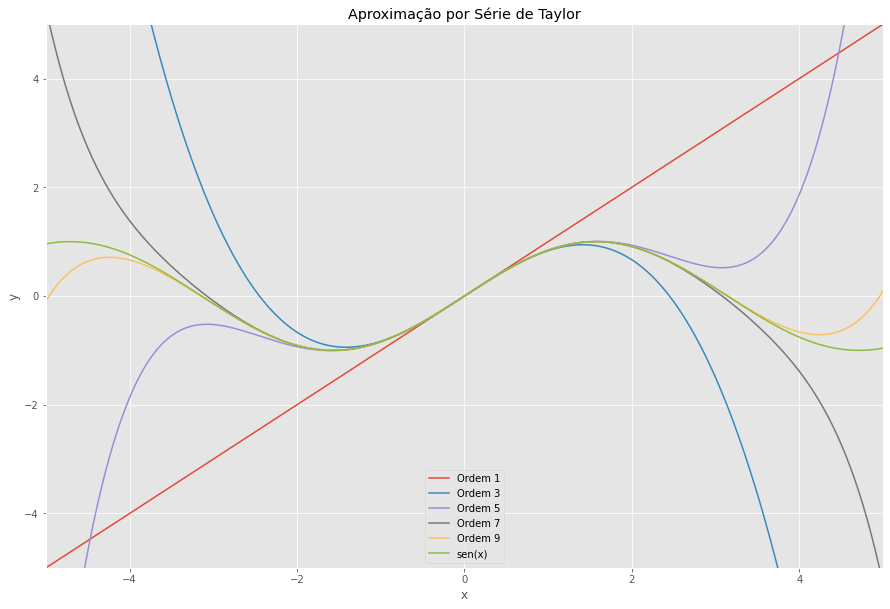

In [ ]:
def plot():
    x_lims = [-5,5]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    y1 = []
    plt.figure(figsize=(15, 10))
    
    # Criando as aproximações por expansão de série de Taylor
    for j in range(1,10,2): # [1,3,5,7,9]
        func = taylor(f,0,j)
        print('n='+str(j))
        display(func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='Ordem '+str(j))
        y1 = []
    # Plotando a função aproximada (sen(x))
    plt.plot(x1,np.sin(x1),label='sen(x)')
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Aproximação por Série de Taylor')
    plt.show()

plot()

### Encontrando o polinônomio por expansão de Taylor da indentidade:
$$\cos(x) = \frac{e^{iz}+e^{-iz}}{2}$$

In [ ]:
i, z = symbols('i z')
i = sqrt(-1)

In [ ]:
math.cos(math.sqrt(-1))

ValueError: ignored

In [ ]:
# Aproximação de Taylor em z = z0 -- Complexos
def taylor_com(function,z0,n):
    cont = 0
    p = 0
    while cont <= n:
        p = p + (function.diff(z,cont).subs(z,z0))/(factorial(cont))*(z-z0)**cont
        cont += 1
    return p

In [ ]:
f1 = exp(z*i)
f2 = exp(z*-i)
display(f1,f2)

In [ ]:
pl1 = taylor_com(f1,0,10)
pl2 = taylor_com(f2,0,10)
display(pl1,pl2)

In [ ]:
res = (pl1+pl2)/2
res

In [ ]:
complex(cos(i))

(1.5430806348152437+0j)

In [ ]:
complex(res.subs(z,i))

(1.5430806327160493+0j)

In [ ]:
a = i
a = 4+4*i

100*abs(complex(cos(a))-complex(res.subs(z,a)))/(abs(complex(cos(a))))

# FIM!